<a href="https://colab.research.google.com/github/sameersat96/Play-store-data-analysis/blob/main/play_store_analysis_and_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Android has over 2.8 billion active users, it has a global market share of 75 percent Android holds over 85% market share in Brazil, India, Indonesia, Turkey and Vietnam Over one billion Android smartphones were shipped last year Samsung is the largest Android smartphone manufacturer, followed by Huawei and Xiaomi.**


**The main purpose of this project is to analyse and get information of app on play store data which provides some usefull output such as app features to improve market of android.**



1. Play store data (main dataset)

This contains data on the Google Play applications. It has 10,841 rows of data witch has following columns:

*  App Category: Category of the app. This could be beauty, business, medical,art and design entertainment, education...etc.

*  Rating: It has How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

*  Reviews: number of user reviews each app has received.

*  Size: The memory size needed to install the application.
 
*  Installs: The number of times each application has been installed by users.

*  Type: Whether the app is free or a paid app.

*  Price: The price of the app.

*  Content Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

*  Genres: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

*  Last Updated: Release date of the most recent update for the app.

*  Current Ver: The app's current version.

*  Android Ver: The oldest version of Android OS supported by the app.


2. Sentiment Analysis

This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:

*  App : Name of the app.

*  Translated_Review: Either the original review in English, or a translated version if the orignal review is in another language.

*  Sentiment: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral or Negative.

*  Sentiment_Polarity: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive).
Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e. it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.

*  Sentiment_Subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from matplotlib import rcParams


import seaborn as sns              # for making plots with seaborn
color = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
path  = "/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/"
 
play_store_df = pd.read_csv(path + "Copy of Play Store Data.csv")
user_review_df = pd.read_csv(path + "Copy of User Reviews.csv")

In [4]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
print(play_store_df.shape)
print(user_review_df.shape)

(10841, 13)
(64295, 5)


#**Task 1: DATA CLEANING**

#**1) Finding missing value and treat them**

In [6]:
# First we need to find missing value in our data
print( ' ' ' missing value is as following' + '\n\n' + ' ' '*'*20)

play_store_df.isnull().sum()


  missing value is as following

 * * * * * * * * * * * * * * * * * * * *


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Data can contain duplicate,NaN type,wrong data type so that we need to clean our data

In [7]:
#checking for duplicates
play_store_df[play_store_df.duplicated(subset=['App'], keep='first')]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [8]:
#delete duplicates from App column.
play_store_df.drop_duplicates(subset=['App'],keep='first', inplace=True, ignore_index=True)


check data remove or not

In [9]:
play_store_df[play_store_df.duplicated(subset=['App'], keep='first')]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [10]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


In [11]:
play_store_df.isnull().sum()


App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Here you can see that Rating seem to have a very high number of missing observations. The current ver, Android ver and content rating also have missing values, as you can see, but they’re pretty negligible compared to Rating.

Replace all null value with their appropriate values use **aggregate function** such as **mean,mode,median**

#**Task 2 :**

#**2)Correcting data type**

In [12]:
# Replacing the null values with the median in the rating column.

median_val =round(play_store_df['Rating'].median(),2)
#median_val
play_store_df['Rating'].fillna(median_val,inplace=True)


In [13]:
play_store_df['Current Ver'].fillna(play_store_df['Current Ver'].mode()[0],inplace=True)
play_store_df['Android Ver'].fillna(play_store_df['Android Ver'].mode()[0],inplace=True)
play_store_df['Content Rating'].fillna(play_store_df['Content Rating'].mode()[0],inplace = True)

In [14]:
# Finding the mod values of column and replacing it null values.

mode_val_type = play_store_df['Type'].mode()[0]
mode_val_type

'Free'

In [15]:
play_store_df['Type'].fillna(mode_val_type,inplace=True)


In [16]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [17]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9660 non-null   object 
 12  Android Ver     9660 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


#**Task 3**

#**Checking**

**Checking outliers**



*   In playstore rating done between 1 to 5 so we need to drop any rating other than this





In [18]:
play_store_df[play_store_df.Rating<1]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
play_store_df[play_store_df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [20]:
play_store_df.drop([9300],inplace=True)   # drop record rating >5

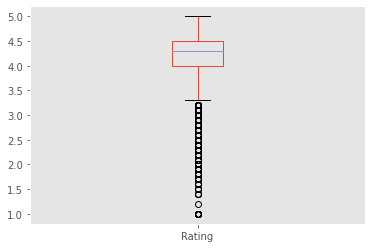

In [21]:
play_store_df.boxplot(column='Rating')
plt.grid(False)


it shows there is no rating present below 1 and above 5

clean data more precisely each column wise

In [22]:
# We need to clean data 
# remove '+' and ',' in Installs column

play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)

play_store_df = play_store_df[~(play_store_df['Installs'] == "Free")].reset_index(drop=True)  #drop  Free from Installs column

play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: int(x)) # convert to int

# Remove '$' from Price column and change to float type
play_store_df['Price']=play_store_df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
play_store_df['Price']=play_store_df['Price'].apply(lambda x: float(x))

play_store_df = play_store_df[~(play_store_df['Price'] == "Everyone")].reset_index(drop=True)  #drop 'Everyone from Price column


In [23]:
play_store_df = play_store_df[~(play_store_df['Size'] == "Varies with device")].reset_index(drop=True)  #drop Varies with device from Price column


In [24]:
play_store_df['Size']=play_store_df['Size'].apply(lambda x: str(x).replace('M','').replace('+','').replace(',','') if 'M' in str(x) else x)

# need to convert kb to Mb formula Mb=kb/1024

play_store_df['Size']=play_store_df['Size'].apply(lambda x: float(str(x).replace('k',''))/1024 if 'k' in str(x) else x)



### change datatype with respect to their data
play_store_df['Size']=play_store_df['Size'].astype(float)
play_store_df['Reviews']=play_store_df['Reviews'].astype(int)


change datatype of last updated to datetime

In [25]:
play_store_df['Last Updated'] = pd.to_datetime(play_store_df['Last Updated'])
#play_store_df['Last Updated']

play store review should not more than installs so we need to check data for same

In [26]:
play_store_df.loc[play_store_df['Reviews']>play_store_df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1546,KBA-EZ Health Guide,MEDICAL,5.0,4,25.000000,1,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up
2836,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.3,4,64.000000,1,Free,0.00,Everyone,Education,2018-07-17,1.0.1,4.4 and up
3904,AX Watch for WatchMaker,PERSONALIZATION,4.3,2,0.232422,1,Paid,0.99,Everyone,Personalization,2017-08-18,1.0,2.3 and up
3999,Ra Ga Ba,GAME,5.0,2,20.000000,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up
4530,Sam.BN Pro,TOOLS,4.3,11,2.000000,10,Paid,0.99,Everyone,Tools,2015-03-27,1.0.0,4.0.3 and up
4692,Brick Breaker BR,GAME,5.0,7,19.000000,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up
5337,Trovami se ci riesci,GAME,5.0,11,6.100000,10,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up
6415,DN Blog,SOCIAL,5.0,20,4.200000,10,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up
6863,DZ Puzzle,FAMILY,4.3,14,47.000000,10,Paid,0.99,Everyone,Puzzle,2017-04-22,1.2,2.3 and up
8300,Mu.F.O.,GAME,5.0,2,16.000000,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up


In [27]:
# removing fake data firstly store in temporary variable
temp_= play_store_df.loc[play_store_df['Reviews']>play_store_df['Installs']].index
play_store_df.drop(labels=temp_,inplace=True)

In [28]:
play_store_df.loc[play_store_df['Reviews']>play_store_df['Installs']]    #checking

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [29]:
play_store_df.isnull().sum()    # missing value procedure done

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#**Correct Data Type**

In [30]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8422 entries, 0 to 8431
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8422 non-null   object        
 1   Category        8422 non-null   object        
 2   Rating          8422 non-null   float64       
 3   Reviews         8422 non-null   int64         
 4   Size            8422 non-null   float64       
 5   Installs        8422 non-null   int64         
 6   Type            8422 non-null   object        
 7   Price           8422 non-null   float64       
 8   Content Rating  8422 non-null   object        
 9   Genres          8422 non-null   object        
 10  Last Updated    8422 non-null   datetime64[ns]
 11  Current Ver     8422 non-null   object        
 12  Android Ver     8422 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 921.2+ KB


#**Exploratory Analysis**

#**1)Basic observation**

**Average App Rating**

In [31]:
play_store_df['Rating'].mean()


4.183210638803105

**Find top five category getting Higest average Rating**

In [32]:
play_store_df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)

Category
EVENTS             4.419298
EDUCATION          4.373034
ART_AND_DESIGN     4.358065
PARENTING          4.338889
PERSONALIZATION    4.320000
Name: Rating, dtype: float64

**Find app with 5 star rating**

In [33]:
play_store_df[play_store_df['Rating']==5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
237,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3 and up
397,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3 and up
400,Awake Dating,DATING,5.0,2,70.0,100,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4 and up
418,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3 and up
421,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8319,Mad Dash Fo' Cash,GAME,5.0,14,16.0,100,Free,0.0,Everyone,Arcade,2017-06-19,2.5a,4.1 and up
8338,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4 and up
8369,Monster Ride Pro,GAME,5.0,1,24.0,10,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3 and up
8413,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up


**Total number of free and paid apps**

In [34]:
play_store_df['Type'].value_counts()

Free    7742
Paid     680
Name: Type, dtype: int64

In [35]:
play_store_df['Price'].max() # max paid app on play store

400.0

**find app which has maximum reviews**

In [36]:
app_name=play_store_df[play_store_df['Reviews'].max()==play_store_df['Reviews']]['App'].index

play_store_df['App'][app_name]

1057    Clash of Clans
Name: App, dtype: object

**Display top 5 Apps having highest reviews**

In [37]:
index1=play_store_df['Reviews'].sort_values(ascending=False).head().index

play_store_df.iloc[index1]['App']

1057                                 Clash of Clans
1042                                 Subway Surfers
1047                                   Clash Royale
1043                               Candy Crush Saga
260     UC Browser - Fast Download Private & Secure
Name: App, dtype: object

In [38]:
expensive_apps = play_store_df.loc[play_store_df['Price'] >=250]

expensive_apps.loc[:, ["App", "Category"]]

,App,Category
2541,most expensive app (H),FAMILY
2666,💎 I'm rich,LIFESTYLE
2670,I'm Rich - Trump Edition,LIFESTYLE
3520,I am rich,LIFESTYLE
3522,I am Rich Plus,FAMILY
3523,I am rich VIP,LIFESTYLE
3524,I Am Rich Premium,FINANCE
3525,I am extremely Rich,LIFESTYLE
3526,I am Rich!,FINANCE
3527,I am rich(premium),FINANCE


In [39]:
expensive_apps["Installs"].groupby(expensive_apps["App"]).sum()

App
Eu Sou Rico                               0
I AM RICH PRO PLUS                     1000
I Am Rich                             10000
I Am Rich Premium                     50000
I Am Rich Pro                          5000
I am Rich                              5000
I am Rich Plus                        10000
I am Rich!                             1000
I am extremely Rich                    1000
I am rich                            100000
I am rich (Most expensive app)         1000
I am rich VIP                         10000
I am rich(premium)                     5000
I'm Rich - Trump Edition              10000
I'm Rich/Eu sou Rico/أنا غني/我很有錢         0
most expensive app (H)                  100
💎 I'm rich                            10000
Name: Installs, dtype: int64

 among most expensive app **I'm rich** most popular app with highest installs

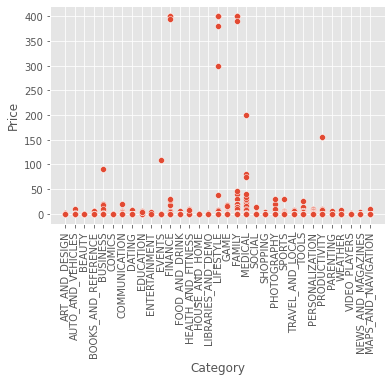

<Figure size 1800x576 with 0 Axes>

In [40]:
sns.scatterplot(x="Category", y="Price",data=play_store_df)

plt.xticks(rotation=90)
plt.figure(figsize=(25,8))
rcParams['figure.figsize'] = 20,9


*  Ignoring the catogories with price > 100$

*  **Medical and Family** apps are the most expensive. Some medical apps extend even upto 80$.

*  All other apps are priced under 50$.

*  Shocking..... all game apps are reasonably priced below 20$.





**Display top 5 app having maximum Installs**

In [41]:
install=play_store_df['Installs'].sort_values(ascending=False).head().index
play_store_df.iloc[install]['App']

1042                           Subway Surfers
2259    Opera News - Trending news and videos
1049                                      Pou
2106                          ASUS Quick Memo
1043                         Candy Crush Saga
Name: App, dtype: object

#**DATA VISUALIZATION**

In [42]:
grp=play_store_df.groupby('Category')
x=grp['Installs'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         1.602227e+06
AUTO_AND_VEHICLES      5.836028e+05
BEAUTY                 2.914245e+05
BOOKS_AND_REFERENCE    5.925880e+05
BUSINESS               1.027736e+06
COMICS                 3.567582e+05
COMMUNICATION          7.512161e+06
DATING                 5.321139e+05
EDUCATION              1.767438e+06
ENTERTAINMENT          9.968125e+06
EVENTS                 1.872307e+05
FAMILY                 2.060888e+06
FINANCE                8.181387e+05
FOOD_AND_DRINK         1.552145e+06
GAME                   1.327096e+07
HEALTH_AND_FITNESS     3.260612e+06
HOUSE_AND_HOME         8.324590e+05
LIBRARIES_AND_DEMO     6.406902e+05
LIFESTYLE              1.211380e+06
MAPS_AND_NAVIGATION    1.626448e+06
MEDICAL                8.607525e+04
NEWS_AND_MAGAZINES     5.925401e+06
PARENTING              4.439076e+05
PERSONALIZATION        2.557656e+06
PHOTOGRAPHY            6.729269e+06
PRODUCTIVITY           4.454683e+06
SHOPPING               4.230648e+06
SOCIAL             

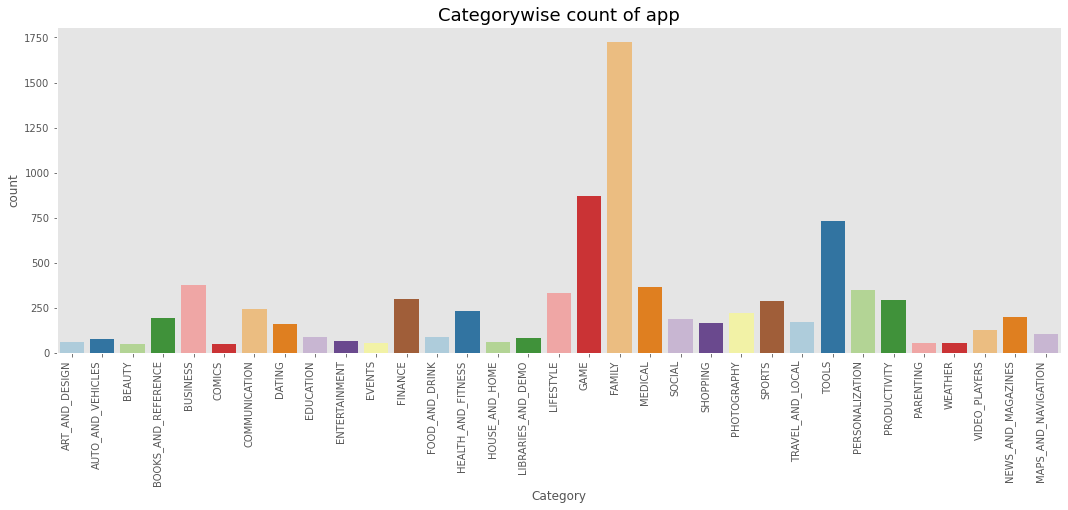

In [43]:
plt.figure(figsize=(18,6))

ax = sns.countplot(x="Category",data=play_store_df,palette="Paired")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax 
plt.title('Categorywise count of app',size = 18)
ax.grid(False)
sns.set_style('white')




*   Game and family subsequently catch high number of market place.


*   Tools,medical and business aslo catch market prevelance




**Rating of apps**

average rating for app is 4.18321


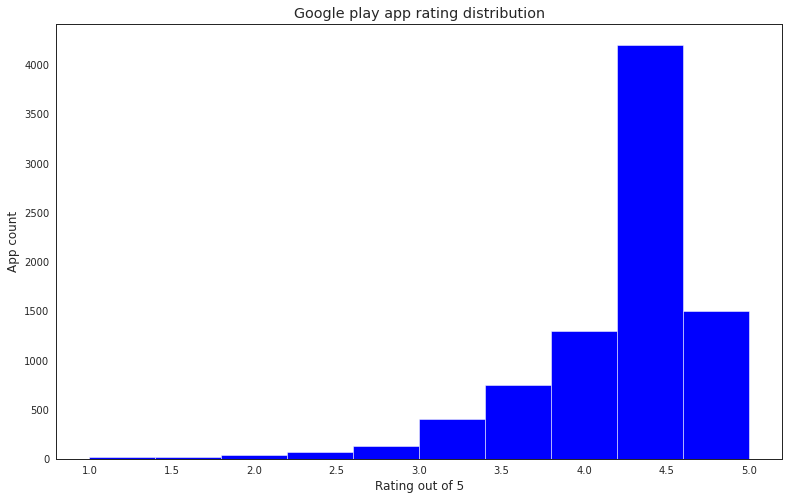

In [44]:
#plot histogram from rating column
plt.figure(figsize=(13,8))
print(f"average rating for app is {round(play_store_df['Rating'].mean(),5)}")

play_store_df['Rating'].hist(color='b')
plt.title('Google play app rating distribution')
plt.ylabel('App count')
plt.xlabel('Rating out of 5')
plt.grid(False)
plt.show()

This histogram shows max **rating** is between **4.1 above**

#**App size light or bulky?**

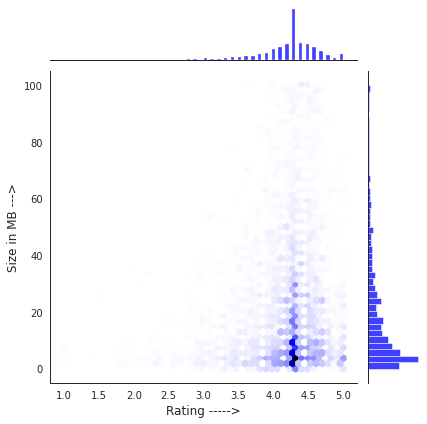

In [45]:

# draw jointplot with
# hex kind
sns.jointplot(x = "Rating", y = "Size",
              kind = "hex",color='b', data = play_store_df)
plt.ylabel('Size in MB --->')
plt.xlabel('Rating ----->')
# Show the plot
plt.show()



*   From above join plot we can colculde that most of good rating app i.e between 4-4.5 is having size 0.1-20MB.

*   generally we see high rating means high size apps that not always true.




**Price category**

Text(0, 0.5, '')

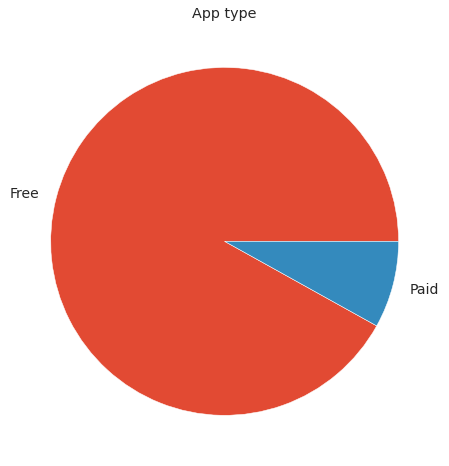

In [46]:
play_store_df['Type'].value_counts().plot.pie(figsize=(12,8),textprops= {'fontsize': 14},subplots=True)
plt.title('App type')
plt.ylabel('')


In [47]:
play_store_df['Type'].value_counts()  

Free    7742
Paid     680
Name: Type, dtype: int64

It shows paid app are lower in number than free app.

**Analysing Content Rating of app**

In [48]:
play_store_df['Content Rating'].value_counts()

Everyone           6908
Teen                897
Mature 17+          340
Everyone 10+        273
Adults only 18+       2
Unrated               2
Name: Content Rating, dtype: int64

unrated and adults only 18+ have very few records we can drop

In [49]:
play_store_df.drop(play_store_df[play_store_df['Content Rating']=='Unrated'].index,inplace=True)
play_store_df.drop(play_store_df[play_store_df['Content Rating']=='Adults only 18+'].index,inplace=True)

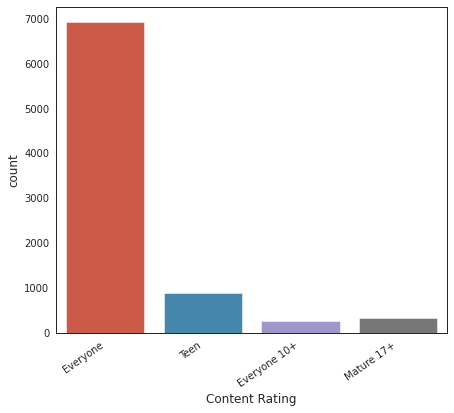

In [50]:
plt.figure(figsize=(7,6))
plt.xticks(rotation = 35, ha = 'right')
ax = sns.countplot(x='Content Rating',data=play_store_df)

This shows most of app present on play store is for everyone means there is no age restriction to use app.

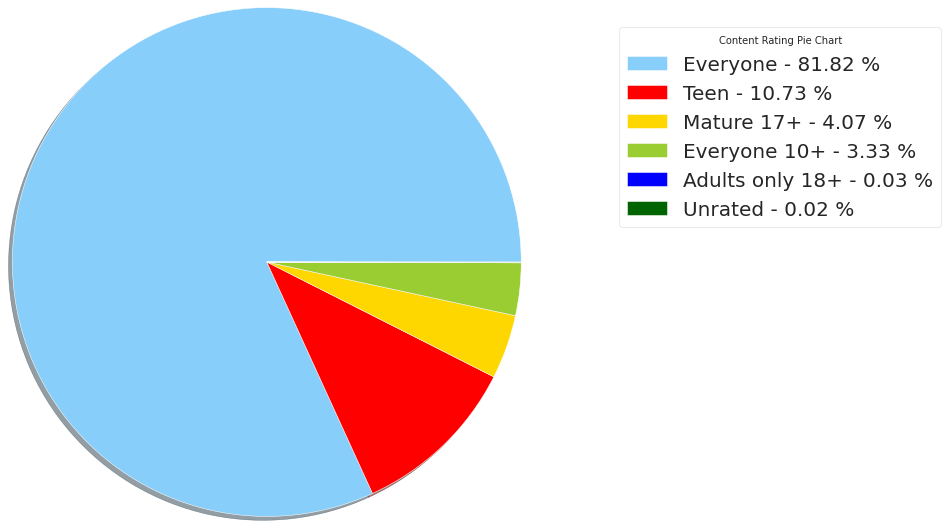

In [51]:
# We Plot the pie chart for Content rating & showing their percentages 
import matplotlib.pyplot as plt
import numpy as np

x = np.char.array(['Everyone','Teen','Mature 17+','Everyone 10+','Adults only 18+','Unrated'])
y = np.array([7903, 1036,393,322, 3, 2])
colors = ['lightskyblue', 'red', 'gold','yellowgreen' ,'blue', 'darkgreen']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors,shadow=True, startangle=360, radius=1.3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels,title='Content Rating Pie Chart', loc='right center', bbox_to_anchor=(1.2, 1.),
           fontsize=20)
plt.savefig('piechart.png', bbox_inches='tight')

**corr for pairwise correlation**

In [52]:
corr=play_store_df.corr()
corr

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.061535,0.045861,0.040724,-0.018674
Reviews,0.061535,1.000000,0.179413,0.597277,-0.008658
Size,0.045861,0.179413,1.000000,0.134353,-0.022460
Installs,0.040724,0.597277,0.134353,1.000000,-0.010159
Price,-0.018674,-0.008658,-0.022460,-0.010159,1.000000


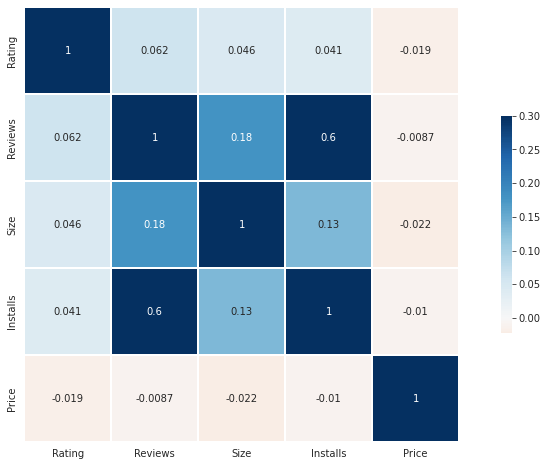

In [53]:
#plot heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,  vmax=.3, center=0, cmap="RdBu",annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.gcf().set_size_inches(15, 8)


*  A moderate positive correlation of 0.63 exists between the number of reviews and number of downloads. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.

*  This shows that many active users who download an app usually also leave back a review or feedback.

*  So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

#**Analysis of sentiment**

App User reviews data can be analyzed to identify customers´ mood: positive, negative or neutral, e.g:

* Positive:'amazing', 'friendly', 'good', 'great', and 'love'.
* Negative: 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

In [54]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [55]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**Merge** original datatype contain **App** and **Type** with this  current dataset

In [56]:
sentiment_df=pd.merge(user_review_df,play_store_df[['App','Type','Price']],how='inner',on='App')

#After this drop null value
sentiment_df = sentiment_df.dropna()
sentiment_df.shape


(24033, 7)

In [57]:
sentiment_df['Type'].value_counts()

Free    23617
Paid      416
Name: Type, dtype: int64

In [58]:
sentiment_df.isnull().sum()  # no null values

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
Type                      0
Price                     0
dtype: int64

In [59]:
sentiment_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Type,Price
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,Free,0.0
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,Free,0.0
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,Free,0.0
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,Free,0.0
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,Free,0.0


We need to find Paid and free sentiment

In [60]:
# A dataframe for each app type
free_apps = sentiment_df[sentiment_df["Type"] == "Free"]
paid_apps = sentiment_df[sentiment_df["Type"] == "Paid"]

In [61]:
# Return normalized values (percentages).
print("Free Apps - Sentiment Percentage \n" + "-"*30 + "\n{}\n\n".format(free_apps['Sentiment'].value_counts(normalize=True) * 100))
print("Paid Apps - Sentiment Percentage \n" + "-"*30 +"\n{}".format(paid_apps['Sentiment'].value_counts(normalize=True) * 100))

Free Apps - Sentiment Percentage 
------------------------------
Positive    63.721048
Negative    22.538849
Neutral     13.740102
Name: Sentiment, dtype: float64


Paid Apps - Sentiment Percentage 
------------------------------
Positive    78.125000
Negative    15.144231
Neutral      6.730769
Name: Sentiment, dtype: float64


In [62]:
# Reset index, then drop the old index column when it is moved to the right as a new column
paid_apps = paid_apps.reset_index().drop(columns=["index"])
free_apps = free_apps.reset_index().drop(columns=["index"])

# Generate a list of random indexes applicable to free_apps
random_indexes = np.random.choice(len(free_apps)-1, len(paid_apps), replace=False)

# Shorten free_apps to the same size of paid_apps & using a random selection
free_apps = free_apps.iloc[random_indexes]

# Reset index of free_apps
free_apps = free_apps.reset_index().drop(columns=["index"])

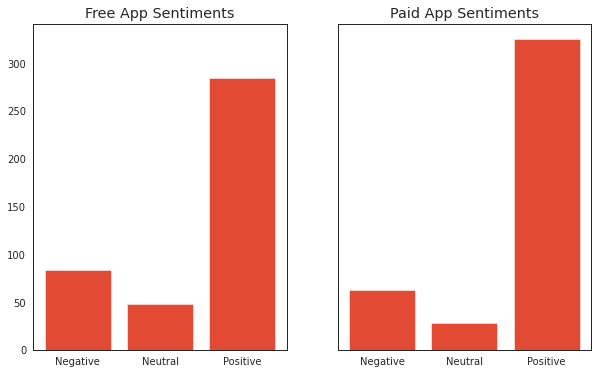

In [63]:
# Generate values & counts for Sentiment columns in our dataframes & put them in dictionaries
val_ct_free = np.unique(free_apps['Sentiment'],return_counts=True)
free_data = {value: count for value, count in zip(val_ct_free[0],val_ct_free[1])}

val_ct_paid = np.unique(paid_apps['Sentiment'],return_counts=True)
paid_data = {value: count for value, count in zip(val_ct_paid[0],val_ct_paid[1])}


# Put values and counts each in a different variable for use in plots, taken from dictionaries
free_names = list(free_data.keys())
free_values = list(free_data.values())
paid_names = list(paid_data.keys())
paid_values = list(paid_data.values())


# Create a figure containing plots for each app type, sharing the y-axis for comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 6),sharey=True)
axs[0].bar(free_names, free_values)
axs[0].set_title("Free App Sentiments")
axs[1].bar(paid_names, paid_values)
axs[1].set_title("Paid App Sentiments")
plt.show()

Free apps as we can see negative as well as neutral review so high varience.
paid app has more positive review very less neutral and negative reviews as comapre to postive reviews 


#**sentiment analysis based on category**

In [64]:
# First we merge the Category & App of 1st data set to App column in 2nd data set
category_df = pd.merge(sentiment_df, play_store_df[["App","Category"]] , how='inner', on="App")

# Drop all nan values
category_df =category_df.dropna()

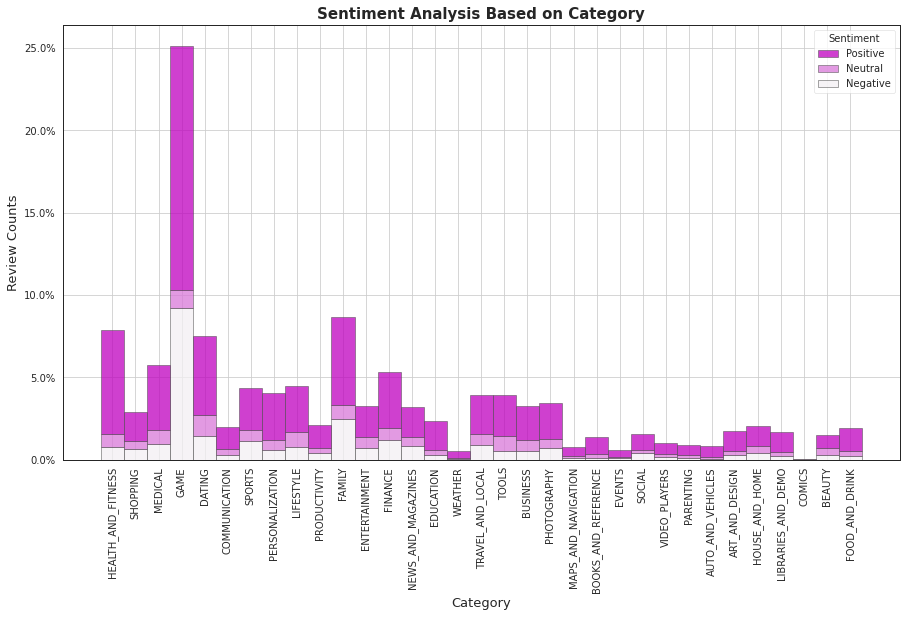

In [65]:
from matplotlib.ticker import PercentFormatter

f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)

sns.histplot(
    category_df,
    x="Category", hue="Sentiment",
    bins=34,
    ax=ax, 
    stat="count",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    legend=True
    )


ax.set_title("Sentiment Analysis Based on Category",fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical')
ax.set_xlabel("Category",fontsize=13)
ax.set_ylabel("Review Counts",fontsize=13)

plt.gca().yaxis.set_major_formatter(PercentFormatter(20000))
sns.set(style="ticks")
plt.grid()
plt.show()

Family, Sports and Health & Fitness apps perform the best, Having more positive reviews

On the contrary, many Game and Social apps perform decent leading to 50% positive and 50% negative.

#**Sentiment Polarity**

-The polarity of a sentiment measures how negative or positive the context is.

-In the data that we have, the polarity ranges from -1 (most negative) to +1 (most positive).

Let's find out by plotting polarity for both free & paid app types:

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

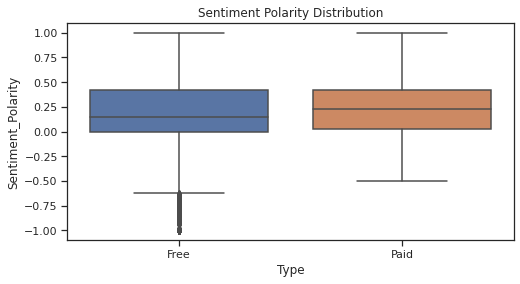

In [66]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = sentiment_df)
ax.set_title('Sentiment Polarity Distribution')

#**WORDCLOUD -quick overlook**

**for free app**

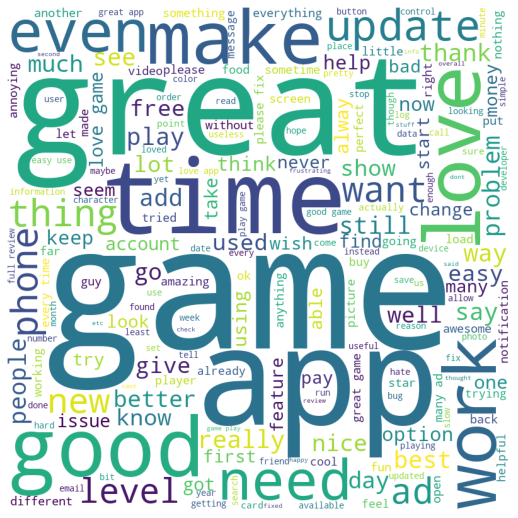

In [67]:
from wordcloud import WordCloud, STOPWORDS

free_apps = sentiment_df[sentiment_df["Type"] == "Free"]


comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in free_apps.Translated_Review:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)




# plot the WordCloud image                       
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()                

**For paid app**

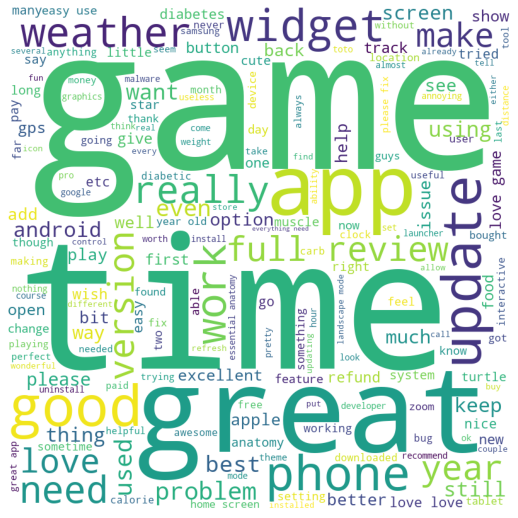

In [68]:
paid_apps = sentiment_df[sentiment_df["Type"] == "Paid"]


comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in paid_apps.Translated_Review:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

                
  
# plot the WordCloud image                       
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [69]:
sentiment_df['Sentiment'].value_counts()

Positive    15374
Negative     5386
Neutral      3273
Name: Sentiment, dtype: int64

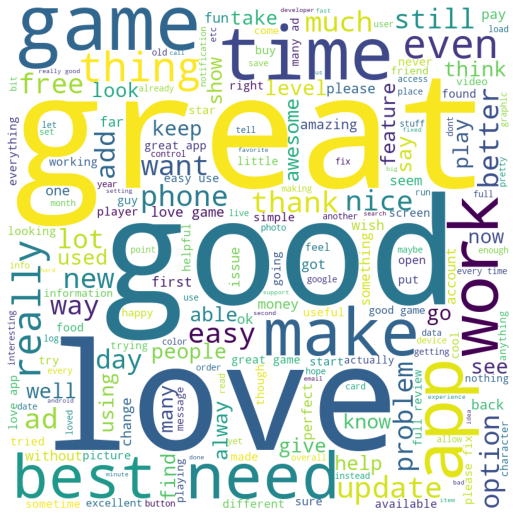

In [ ]:
## Merge the two datasets
merged_df1 = play_store_df.merge(user_review_df, on = "App")
merged_df1.head()

## Drop the NA values
merged_df1 = merged_df1.dropna(subset=['Translated_Review'])

In [106]:
## Wordcloud Function
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50, )
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    plt.title('Common Words in Reviews')

## Frequency of words in translated review column
from collections import Counter
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
import re

top_N = 100

pos_review_lower = merged_df1[merged_df1['Sentiment']=='Positive']['Translated_Review'].str.lower().str.cat(sep=' ')
neg_review_lower = merged_df1[merged_df1['Sentiment']=='Negative']['Translated_Review'].str.lower().str.cat(sep=' ')
neu_review_lower = merged_df1[merged_df1['Sentiment']=='Neutral']['Translated_Review'].str.lower().str.cat(sep=' ')


## Remove Punctuations
pos_review_remove_pun = re.sub('[^A-Za-z]+', ' ', pos_review_lower)
neg_review_remove_pun = re.sub('[^A-Za-z]+', ' ', neg_review_lower)
neu_review_remove_pun = re.sub('[^A-Za-z]+', ' ', neu_review_lower)




In [107]:
#remove all the stopwords from the text
pos_word_tokens_tags = word_tokenize(pos_review_remove_pun)
neg_word_tokens_tags = word_tokenize(neg_review_remove_pun)
neu_word_tokens_tags = word_tokenize(neu_review_remove_pun)
pos_filtered_sentence_tags = [w_tags for w_tags in pos_word_tokens_tags if not w_tags in stop]
pos_filtered_sentence_tags = []
for w_tags in pos_word_tokens_tags:
    if w_tags not in stop:
        pos_filtered_sentence_tags.append(w_tags)

neg_filtered_sentence_tags = [w_tags for w_tags in neg_word_tokens_tags if not w_tags in stop]
neg_filtered_sentence_tags = []
for w_tags in neg_word_tokens_tags:
    if w_tags not in stop:
        neg_filtered_sentence_tags.append(w_tags)
        
neu_filtered_sentence_tags = [w_tags for w_tags in neu_word_tokens_tags if not w_tags in stop]
neu_filtered_sentence_tags = []
for w_tags in neu_word_tokens_tags:
    if w_tags not in stop:
        neu_filtered_sentence_tags.append(w_tags)

In [108]:
# Remove characters which have length less than 2  

pos_without_single_chr_rev = [word_tags for word_tags in pos_filtered_sentence_tags if len(word_tags) > 2]
neg_without_single_chr_rev = [word_tags for word_tags in neg_filtered_sentence_tags if len(word_tags) > 2]
neu_without_single_chr_rev = [word_tags for word_tags in neu_filtered_sentence_tags if len(word_tags) > 2]


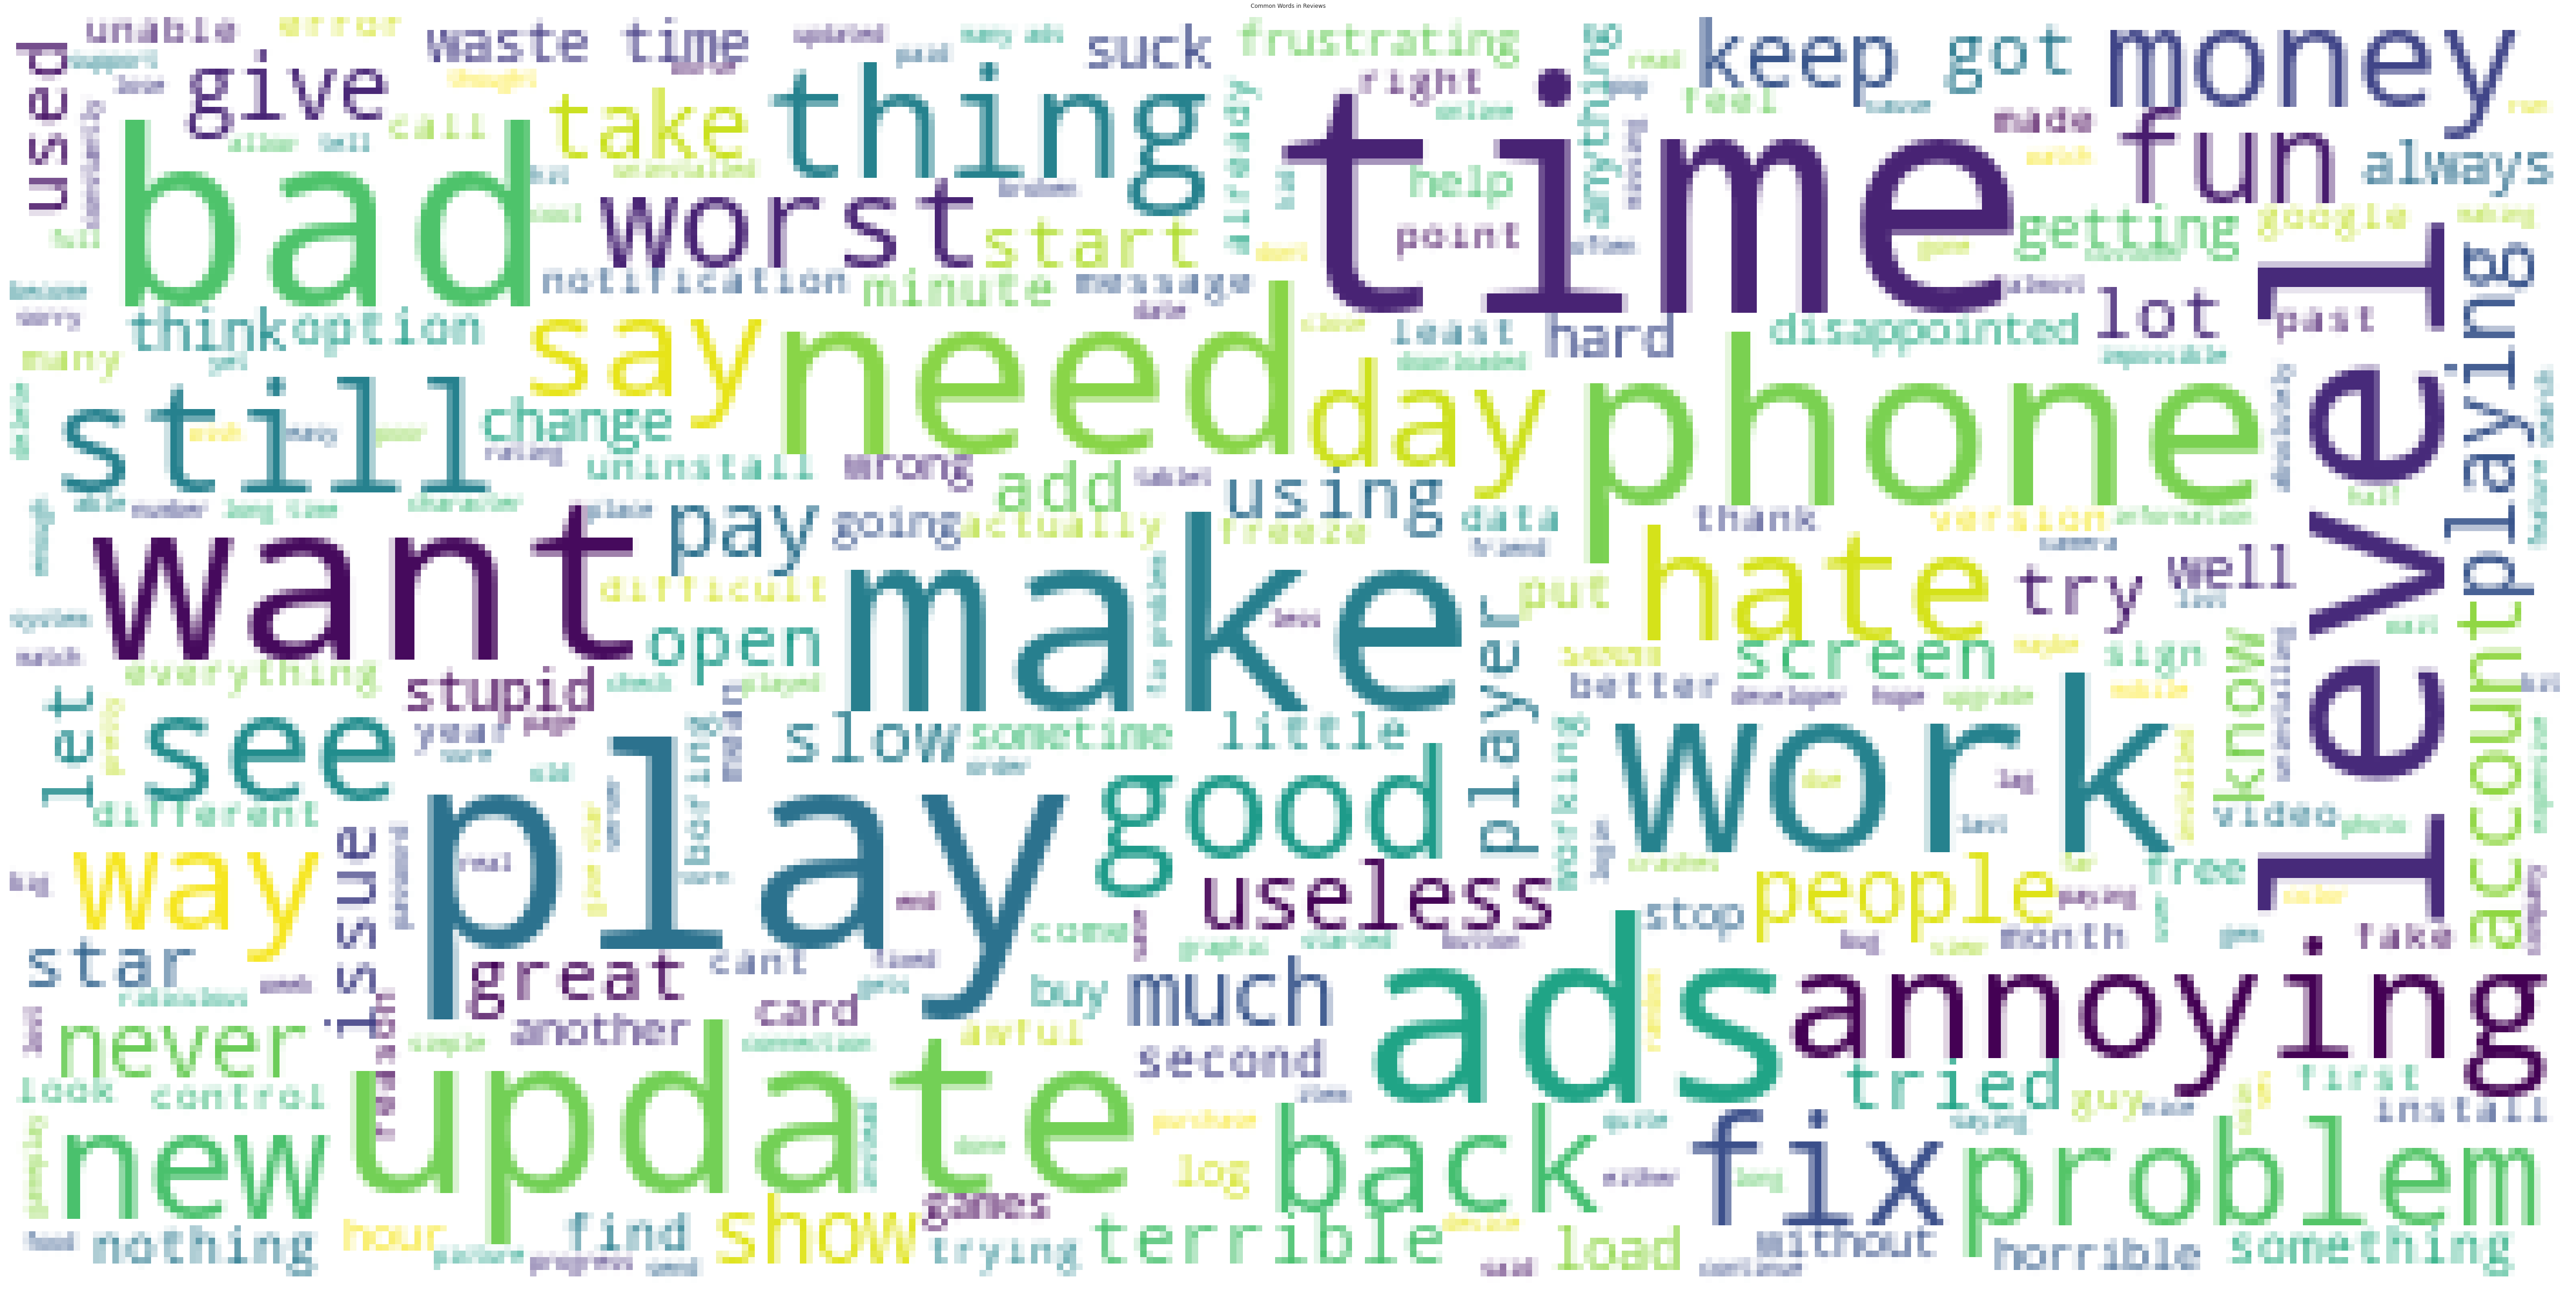

In [111]:
## Wordcloud of Negative Reviews
wc(neg_without_single_chr_rev,'white','Common Words' )
             

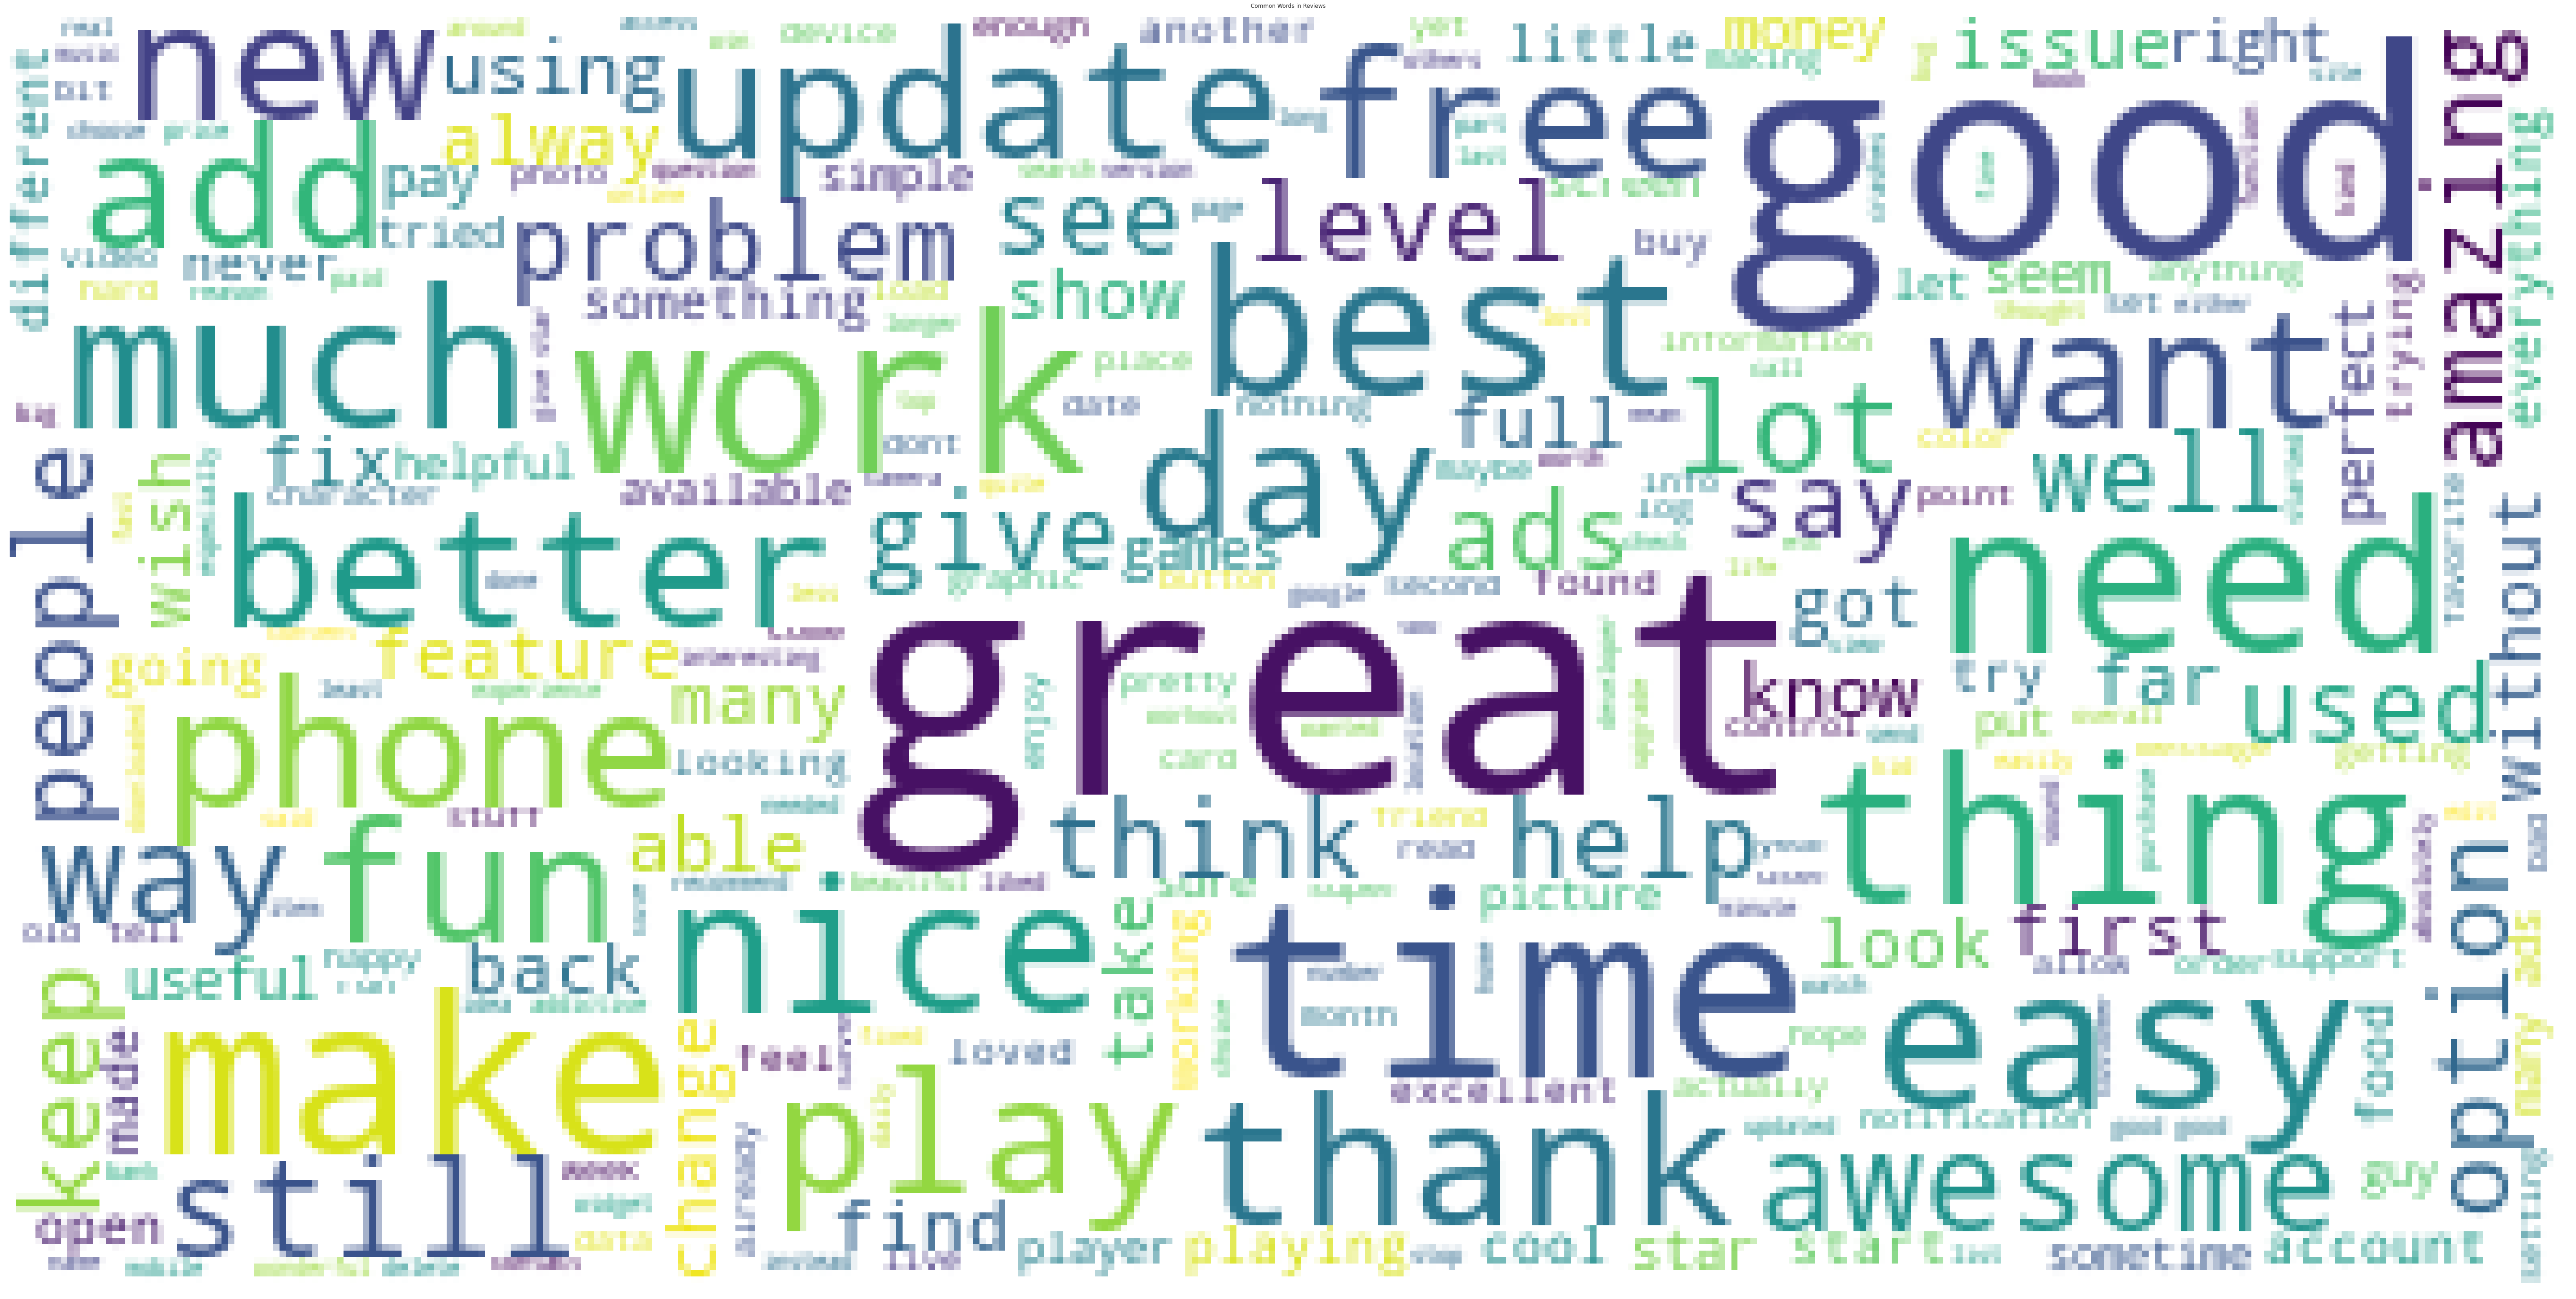

In [113]:
## Wordcloud of Positive Reviews
wc(pos_without_single_chr_rev,'white','Common Words' )


However, this did not provide any tangible insights. Our aim was to analyse the reviews and get a better idea of the common issues that people face with apps or the attributes that make an app popular. To accomplish this, we proceeded to extract phrases (pairs of words) to get a better understanding that will support our analysis.

In [102]:
## let's see the distribution of postive, neg reviews in each category
sentiment_count = merged_df1.groupby(["Category","Sentiment"]).agg({'App': 'count'}).reset_index()
sentiment_sum =  merged_df1.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
print(sentiment_sum.head())
print(sentiment_count.head())

              Category  Sentiment
0       ART_AND_DESIGN        345
1    AUTO_AND_VEHICLES        164
2               BEAUTY        302
3  BOOKS_AND_REFERENCE        275
4             BUSINESS        655
            Category Sentiment  App
0     ART_AND_DESIGN  Negative   58
1     ART_AND_DESIGN   Neutral   54
2     ART_AND_DESIGN  Positive  233
3  AUTO_AND_VEHICLES  Negative   11
4  AUTO_AND_VEHICLES   Neutral   20


In [114]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=250, colormap="Set2")
from nltk import sent_tokenize, word_tokenize

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher','please','love','it','the','i',
              'I','my','like','really','every','would','even','though','game','review']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [115]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 300,  max_font_size = 50, )
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    plt.title('Common Phrases in Reviews')

In [116]:
def pair_split(x):
    words = re.sub('[^A-Za-z_]+', ' ', x)
    words = words.split()
    words_new = [x for x in words if x not in stop]
    if len(words_new) == 1:
        return words_new
    else:
        pairs = [words_new[i]+'_'+words_new[i+1] for i in range(len(words_new)-1)]
        return pairs

In [117]:
## Frequency of words in translated review column
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

top_N = 100

## Get every pair of words from the reviews

pos_review_lower = merged_df1[merged_df1['Sentiment']=='Positive']['Translated_Review'].str.lower().apply(pair_split).apply(lambda x: " ".join(x)).str.cat(sep=' ')
neg_review_lower = merged_df1[merged_df1['Sentiment']=='Negative']['Translated_Review'].str.lower().apply(pair_split).apply(lambda x: " ".join(x)).str.cat(sep=' ')

pos_review_lower_rem = pos_review_lower.split(' ')
pos_review_lower_rem = [a for a  in pos_review_lower_rem if a.find('_') >0]
pos_review_remove_pun = " ".join(pos_review_lower_rem)

neg_review_lower_rem = neg_review_lower.split(' ')
neg_review_lower_rem = [a for a  in neg_review_lower_rem if a.find('_') >0]
neg_review_remove_pun = " ".join(neg_review_lower_rem)



In [122]:
pos_word_tokens_tags = word_tokenize(pos_review_remove_pun)
neg_word_tokens_tags = word_tokenize(neg_review_remove_pun)

pos_filtered_sentence_tags = [w_tags for w_tags in pos_word_tokens_tags if not w_tags in stop]
pos_filtered_sentence_tags = []
for w_tags in pos_word_tokens_tags:
    if w_tags not in stop:
        pos_filtered_sentence_tags.append(w_tags)

neg_filtered_sentence_tags = [w_tags for w_tags in neg_word_tokens_tags if not w_tags in stop]
neg_filtered_sentence_tags = []
for w_tags in neg_word_tokens_tags:
    if w_tags not in stop:
        neg_filtered_sentence_tags.append(w_tags)
        


In [119]:
# Remove characters which have length less than 2  

pos_without_single_chr_rev = [word_tags for word_tags in pos_filtered_sentence_tags if len(word_tags) > 2]
neg_without_single_chr_rev = [word_tags for word_tags in neg_filtered_sentence_tags if len(word_tags) > 2]


In [120]:
counts = Counter(neg_without_single_chr_rev)
count_top30 = counts.most_common(10)
count_top30

[('waste_time', 137),
 ('long_time', 65),
 ('many_ads', 64),
 ('worst_ever', 57),
 ('google_play', 48),
 ('give_stars', 46),
 ('angry_birds', 42),
 ('gift_card', 42),
 ('last_update', 39),
 ('spend_money', 37)]

Text(0.5, 1.0, 'Common Phrases in Negative Reviews')

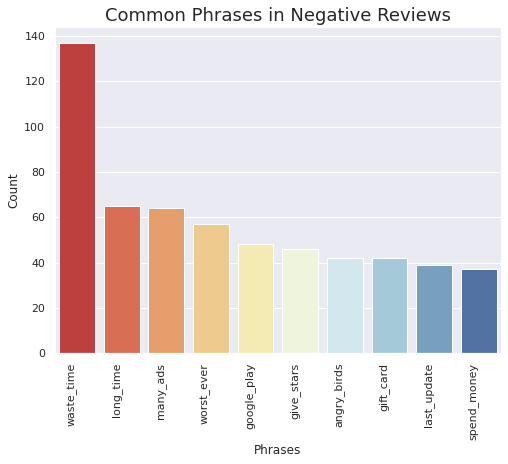

In [96]:
count_top30_df = pd.DataFrame(count_top30, columns=["Phrases","Count"])
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
category_plot = sns.barplot(x="Phrases",y ="Count",data=count_top30_df, palette = "RdYlBu")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
plt.title('Common Phrases in Negative Reviews',size = 18)

In [97]:
from collections import Counter
counts = Counter(pos_without_single_chr_rev)
count_top30 = counts.most_common(10)
count_top30

[('many_ads', 243),
 ('free_version', 107),
 ('much_better', 105),
 ('best_ever', 104),
 ('user_friendly', 96),
 ('works_great', 95),
 ('highly_recommend', 93),
 ('first_time', 88),
 ('wish_could', 88),
 ('way_many', 86)]

Text(0.5, 1.0, 'Common Phrases in Positive Reviews')

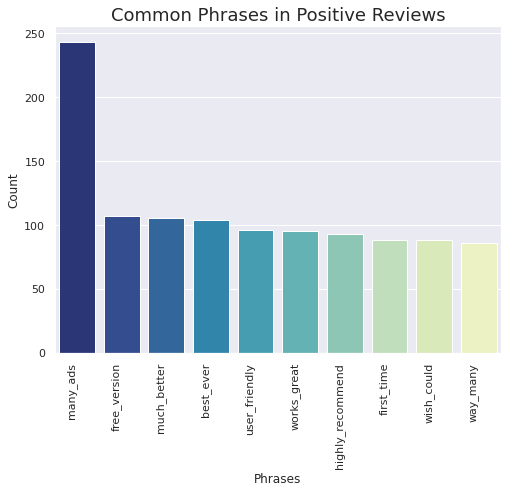

In [98]:
count_top30_df = pd.DataFrame(count_top30, columns=["Phrases","Count"])
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
category_plot = sns.barplot(x="Phrases",y ="Count",data=count_top30_df, palette = "YlGnBu_r")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
plt.title('Common Phrases in Positive Reviews',size = 18)

We extracted phrases from the reviews and observed that positive reviews had phrases like “many ads”, “free version”, “best ever” and “highly recommend”. The negative reviews contained phrases like “waste time”, “many ads”, “long time” and “worst ever”. We can see that loading time and ads were one of the main concerns amongst users. On the other hand, usability is one of the reasons that users give positive reviews.

In [72]:
paid_apps=sentiment_df[sentiment_df['Type']=='Paid']
 
free_apps=sentiment_df[sentiment_df['Type']=='Free']
 


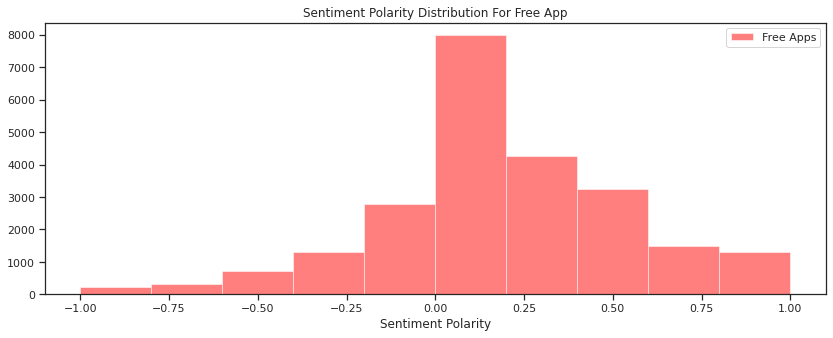

In [73]:

polarity_free = free_apps["Sentiment_Polarity"]

# Plot two histograms showing sentiment polarity of each app type
plt.figure(figsize=(14,5))
plt.hist(polarity_free, color="red",alpha=.5, label="Free Apps")

plt.title('Sentiment Polarity Distribution For Free App')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

*  When we look at this graph, we find that there is more neutral polarity in free apps, as shown by the larger red region just above the 0.00 on the x axis.

*  As we can se there is a more extreme positive polarity for free apps, as seen on the x axis in the range of 0.5 to 1.00.


*  While some sentiments are exceptionally positive, none fall below -0.5, suggest greater overall satisfaction with paid apps and demonstrating a minimum cap for negative sentiments.




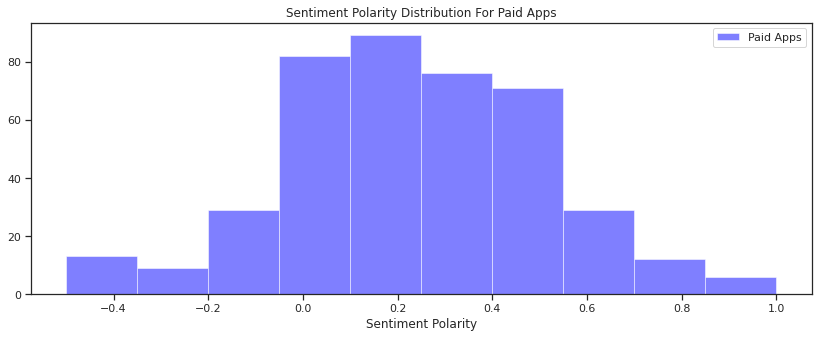

In [74]:
polarity_paid = paid_apps['Sentiment_Polarity']

# Plot two histograms showing sentiment polarity of each app type
plt.figure(figsize=(14,5))
plt.hist(polarity_paid, color="blue",alpha=.5, label="Paid Apps")

plt.title('Sentiment Polarity Distribution For Paid Apps')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

*  For Paid apps, the majority of opinions fall somewhere between 0 and 0.5.

*  While some sentiments are exceptionally positive, none fall below -0.5, suggesting greater overall satisfaction with paid apps and demonstrating a minimum cap for negative sentiments.

## **Final Conclusion**

*  **Average rating** of (active) apps on Google Play Store is **4.18**

*  Most  of user like light app and willing to pay for it also. Thus, a paid app that is bulky may not perform well in the market thats reason for getting good installs.

*  Most of the **top rated apps are optimally sized between ~0.1MB to ~20MB - neither too light nor too heavy.**

*  **Medical and Family** apps are the most expensive and even extend upto 80$.

*  Users tend to download a given app more if it has been reviewed by a large number of people.

*  Paid apps have a slightly higher number of favourable reviews than free apps.

*  Free apps get more negative and neutral feedback, suggesting a wider range of opinions.

*  **Clash of Clans** app has most number of reviews. While **Subway Surfers** is most number of install app

*  When it comes to free apps, users are more pessimistic and harsh than when it comes to paid apps.

*  More than half users rate **Family, Sports and Health & Fitness apps** positively. Apps for games and social media get mixed reviews, with 50 percent positive and 50 percent negative responses.



#Reference

*  www.stackovverflow.com
*  www.jovian.ai         
*  https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/